In [1]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
sys.path.append(str(PROJECT_ROOT))

In [2]:
from evaluator.tester import Tester, train_ds, val_ds, test_ds

e:\RUSHIL\Courses\Agentic_AI\AI_Engineer_Core\ai-pricer\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [3]:
import re
from common.constants import (
    OPENROUTER_BASE_URL,
    OPENROUTER_API_KEY,
)
from models.item import Item
from openai import OpenAI

SYSTEM_PROMPT = """
You are a price estimator who estimates the price of a product based on its description.
Respond with only the price number in dollars. Do not include currency symbol, just respond with the number.
"""
MODEL = "deepseek/deepseek-r1-0528:free"


def get_messages(item: Item) -> list:
    messages = [
        {"role": "system", "content": SYSTEM_PROMPT},
        {
            "role": "user",
            "content": "Estimate the price of this product" + "\n" + item.summary,
        },
    ]
    return messages


def llm_model(item: Item) -> float:
    openai_client = OpenAI(base_url=OPENROUTER_BASE_URL, api_key=OPENROUTER_API_KEY)
    response = openai_client.chat.completions.create(
        model=MODEL,
        messages=get_messages(item),
    )
    estimated_price = response.choices[0].message.content
    estimated_price = re.sub(r"[^0-9.]", "", estimated_price)
    try:
        estimated_price = float(estimated_price)
    except Exception as err:
        print(f"Error: {err}")
        return 0
    return estimated_price

1: Guess: $45.00 Truth: $35.00 Error: $10.00 SLE: 0.06 Item: Small Soar Dove Bird Necklace, Delicate ...
2: Guess: $25.00 Truth: $25.00 Error: $0.00 SLE: 0.00 Item: Omaha Steaks Gift Card
3: Guess: $329.00 Truth: $285.00 Error: $44.00 SLE: 0.02 Item: Ohana Baritone Ukulele Model BK-20CE
4: Guess: $25.00 Truth: $4.88 Error: $20.12 SLE: 2.21 Item: BodyGuardz - Pure 2 Edge Glass Screen Pr...
5: Guess: $10.00 Truth: $5.00 Error: $5.00 SLE: 0.37 Item: Numer 1 Dad Iron On Decal, Father's Day ...
6: Guess: $18.50 Truth: $16.99 Error: $1.51 SLE: 0.01 Item: I Love My Maltese Rhinestone Iron on Tra...
7: Guess: $80.00 Truth: $84.99 Error: $4.99 SLE: 0.00 Item: JJ Electronics Amplifier Tubes (T-EL84-J...
Error: could not convert string to float: '68.0070.0075.0069.0074.0065.0065.00'
8: Guess: $0.00 Truth: $18.99 Error: $18.99 SLE: 8.97 Item: Women’s Satin Kimono Robe for Bridesmaid...
9: Guess: $24.99 Truth: $22.08 Error: $2.91 SLE: 0.01 Item: Monoprice PLA Plus+ Premium 3D Filament ...
10: Guess

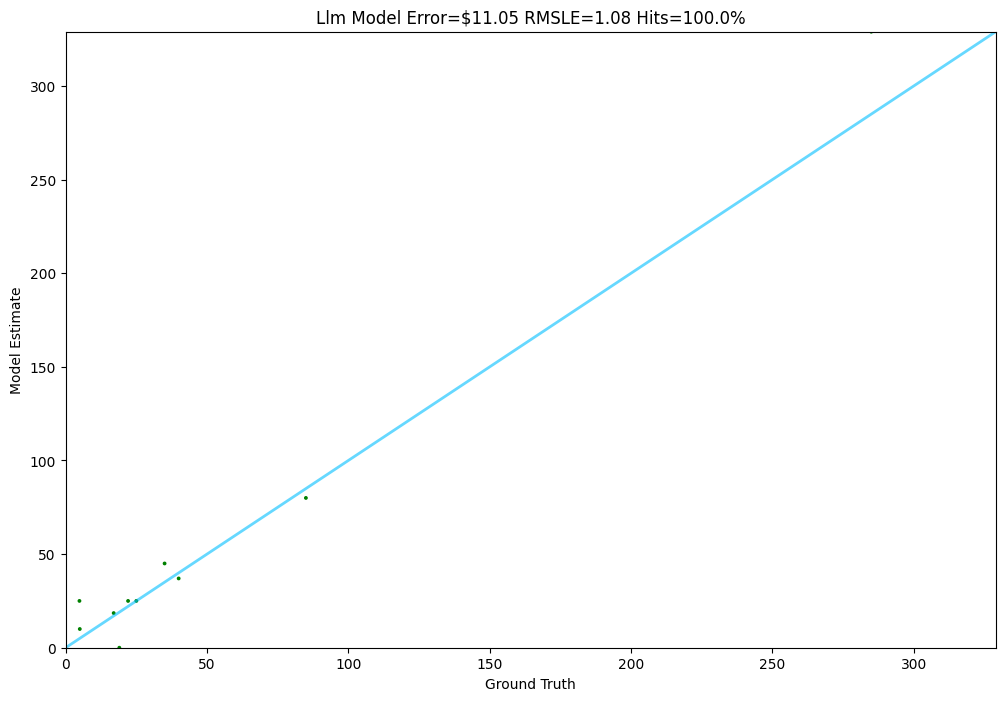

In [4]:
Tester.test(llm_model, max_datapoints=10)  # Limiting datapoints due to rate limits